In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [2]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\student_performance.csv')

In [3]:
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


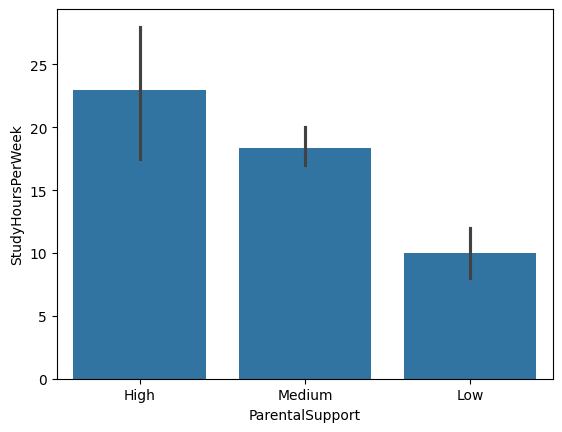

In [5]:
sns.barplot(x='ParentalSupport',y='StudyHoursPerWeek',data=df)
plt.show()

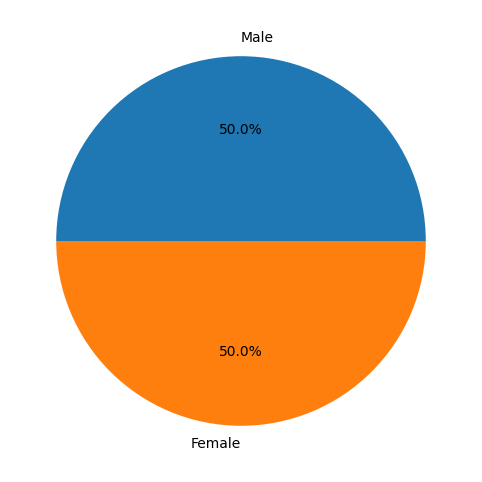

In [6]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

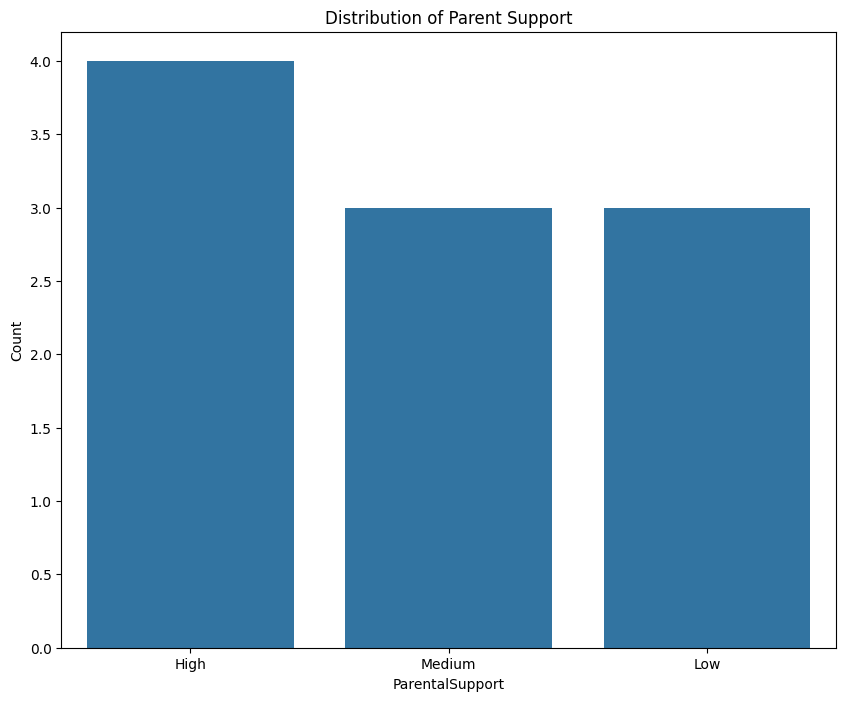

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='ParentalSupport')
plt.title('Distribution of Parent Support')
plt.xlabel('ParentalSupport')
plt.ylabel('Count')
plt.show()

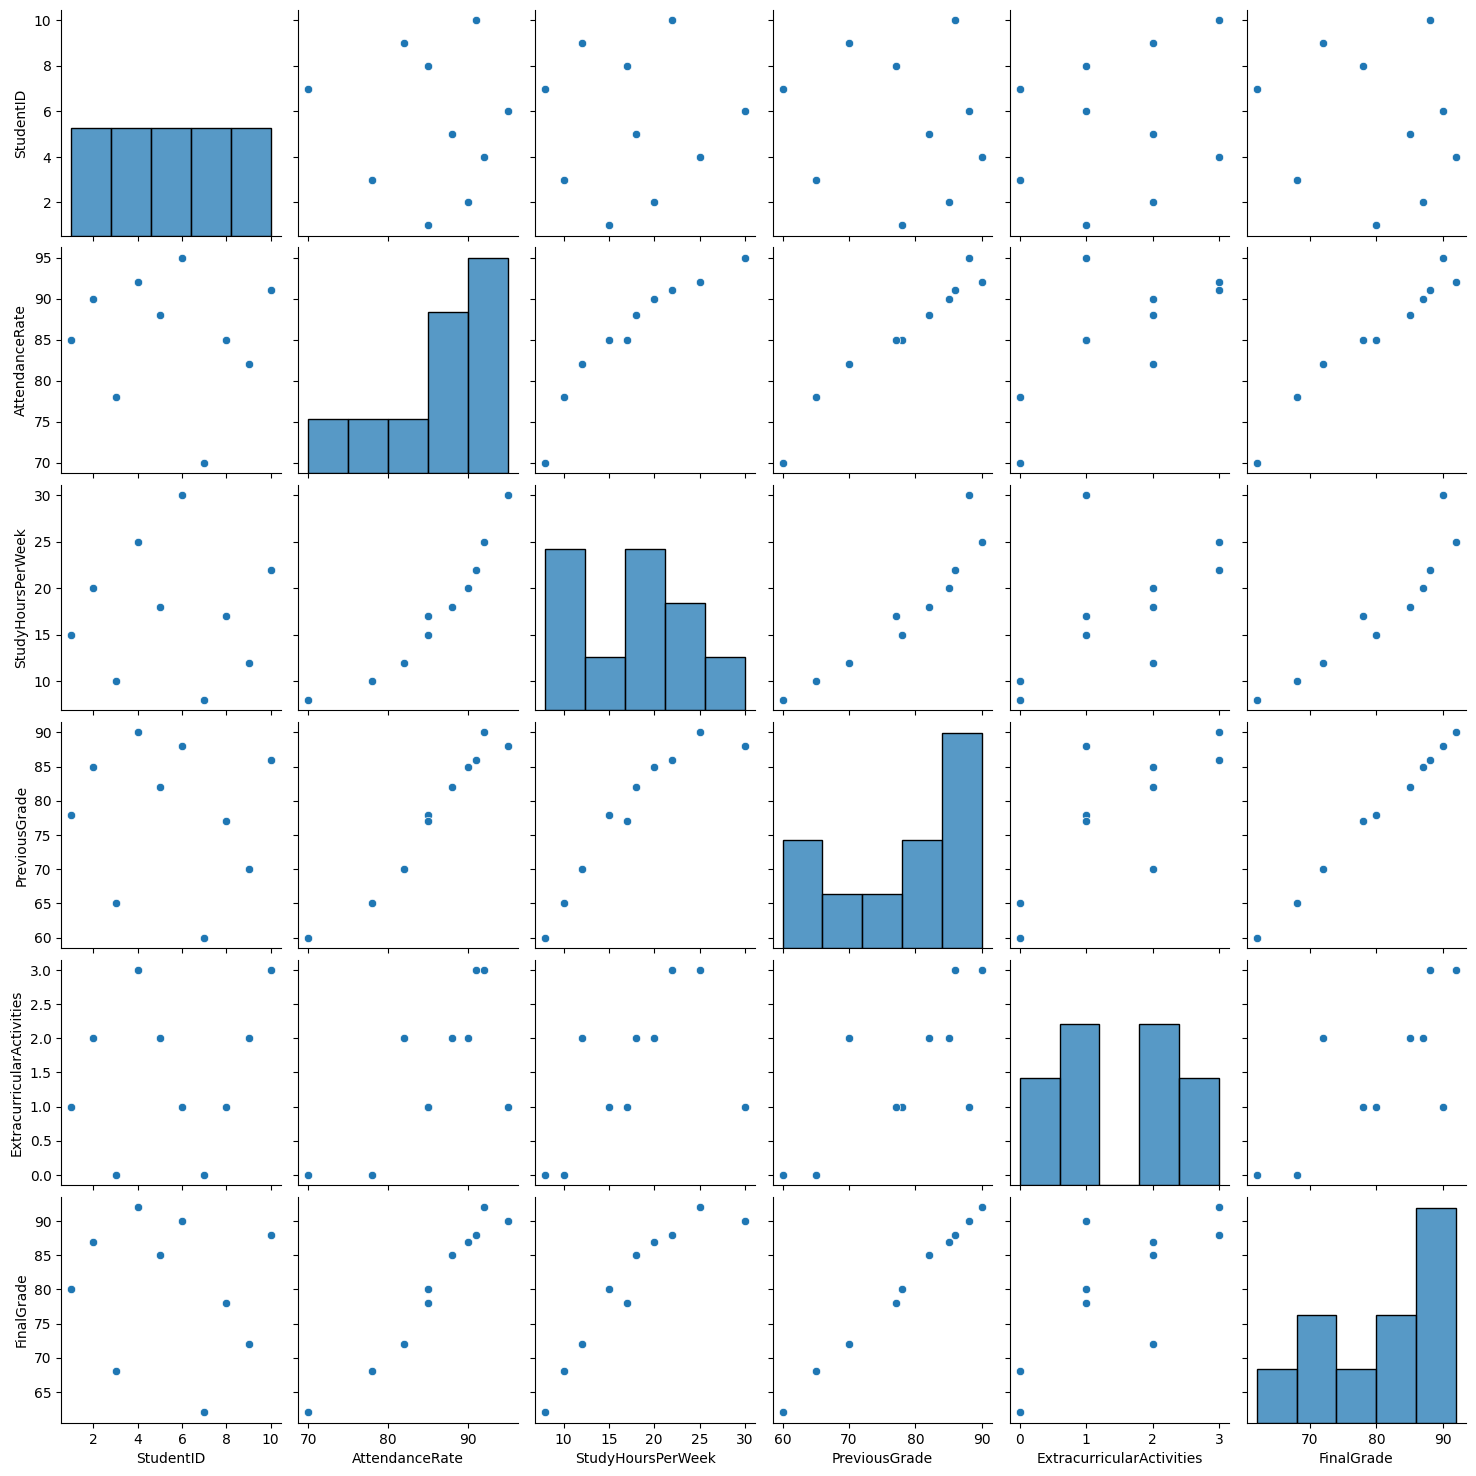

In [8]:
sns.pairplot(df)
plt.show()

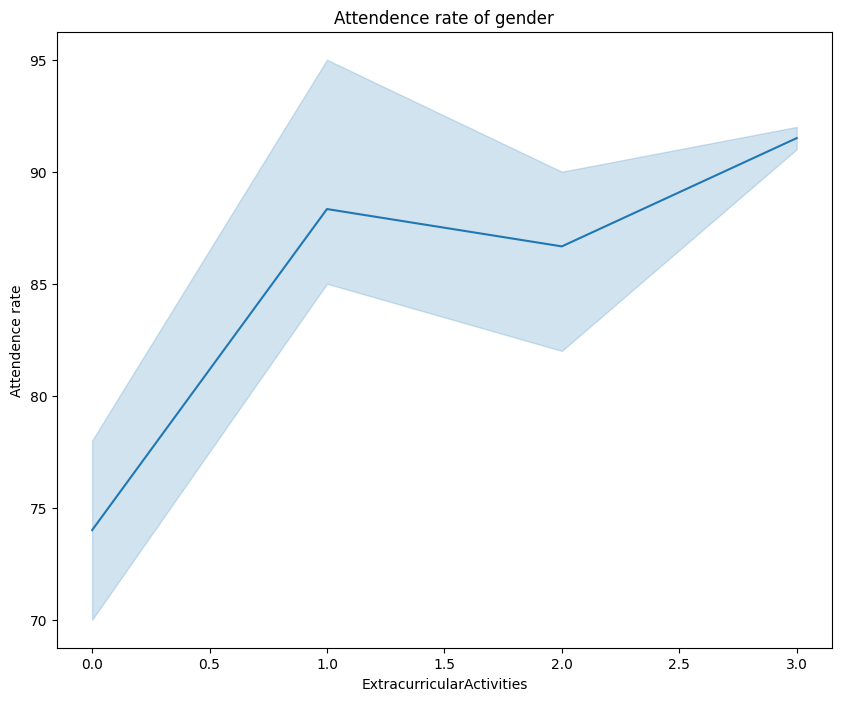

In [9]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='ExtracurricularActivities',y='AttendanceRate')
plt.title('Attendence rate of gender')
plt.xlabel('ExtracurricularActivities')
plt.ylabel('Attendence rate')
plt.show()

In [10]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

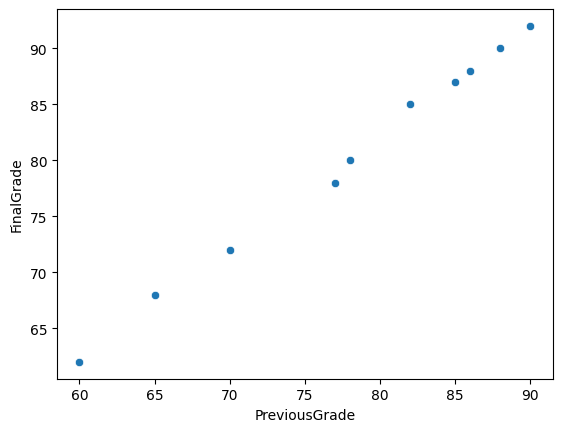

In [11]:
sns.scatterplot(x='PreviousGrade',y='FinalGrade',data=df)
plt.show()

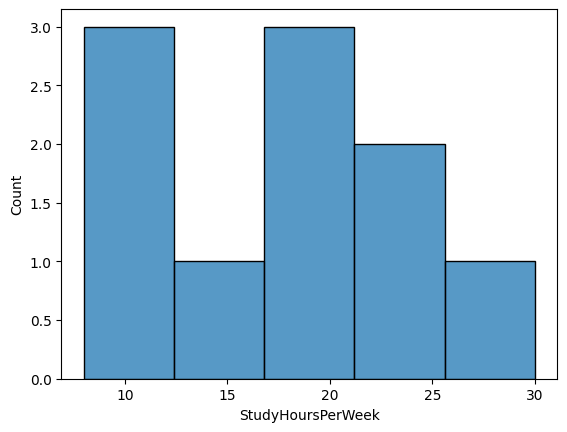

In [12]:
sns.histplot(df['StudyHoursPerWeek'],bins=5)
plt.show()

In [13]:
df=df.drop(columns=['StudentID'])

In [14]:
df=df.drop(columns=['Name'])

In [15]:
from sklearn.preprocessing import LabelEncoder

df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['ParentalSupport']=LabelEncoder().fit_transform(df['ParentalSupport'])

In [16]:
df.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,85,15,78,1,0,80
1,0,90,20,85,2,2,87
2,1,78,10,65,0,1,68
3,1,92,25,90,3,0,92
4,0,88,18,82,2,2,85


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [20]:
x=df.drop('FinalGrade',axis=1)
y=df['FinalGrade']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train_scale=StandardScaler().fit_transform(x_train)
x_test_scale=StandardScaler().fit_transform(x_test)

In [23]:
model=LogisticRegression()
model.fit(x_train_scale,y_train)

LogisticRegression()

In [25]:
y_pred=model.predict(x_test_scale)

In [26]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.0


c:\Users\Saravanan\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saravanan\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          72       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       0.0
          85       0.00      0.00      0.00       0.0
          87       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\Saravanan\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saravanan\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saravanan\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average